# Chapter4 - Exercise 1: Click Prediction

+ Cho dữ liệu Click_prediction_small (link: https://www.openml.org/d/1220 (https://www.openml.org/d/1220) 
+ hoặc sklearn.datasets import fetch_openml với data_id = 1220).

## Yêu cầu: Hãy đọc dữ liệu từ tập tin này, áp dụng Naive Bayes để thực hiện việc xác định người dùng có click vào một quảng cáo hay không
dựa trên các thông tin được cung cấp.

## Yêu cầu:
1. Hãy chuẩn hóa dữ liệu cho phù hợp
2. Áp dụng Naive Bayes. Nhận xét kết quả.
3. Model trên có phù hợp không? Nếu không thì đưa ra phương án khác.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [104]:
from sklearn.datasets import fetch_openml
click = fetch_openml(data_id = 1220)

x = click['data']
y = click['target'].astype(int)

del click

## <span style='color:yellow'> 1. Hãy chuẩn hóa dữ liệu cho phù hợp

In [107]:
x

,impression,ad_id,advertiser_id,depth,position,keyword_id,title_id,description_id,user_id
0,1,8343295,11700,3,3,21264,27892,1559,0
1,1,20017077,23798,1,1,35498,4,36476,562934
2,1,21348354,36654,1,1,19975,36105,33292,11621116
3,1,20366086,33280,3,3,5942,4057,4390,8778348
4,1,6803526,10790,2,1,60593,25242,1679,12118311
...,...,...,...,...,...,...,...,...,...
39943,1,21898643,37867,2,1,1091,1657,1914,0
39944,1,20575578,8873,2,1,8338,7866,9210,19487
39945,5,21183848,18716,2,1,9594,8881,13277,2305
39946,1,21222438,35880,3,3,13078,943122,1436,0


In [109]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   impression      39948 non-null  int64
 1   ad_id           39948 non-null  int64
 2   advertiser_id   39948 non-null  int64
 3   depth           39948 non-null  int64
 4   position        39948 non-null  int64
 5   keyword_id      39948 non-null  int64
 6   title_id        39948 non-null  int64
 7   description_id  39948 non-null  int64
 8   user_id         39948 non-null  int64
dtypes: int64(9)
memory usage: 2.7 MB


In [111]:
x.isnull().sum()

impression        0
ad_id             0
advertiser_id     0
depth             0
position          0
keyword_id        0
title_id          0
description_id    0
user_id           0
dtype: int64

### X is all numeric data => Use GaussianNB

In [114]:
y.value_counts()

click
0    33220
1     6728
Name: count, dtype: int64

### Imbalanced output => Use SMOTE to upsampled

## <span style='color:yellow'> 2. Áp dụng Naive Bayes. Nhận xét kết quả.

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

GaussianNB accuracy score on train set: 0.732718234810285
GaussianNB accuracy score on test set: 0.7331664580725907


Confusion matrix:
           no_click  click
no_click      8351   1634
click         1564    436


Classification report:
               precision    recall  f1-score   support

    no_click       0.84      0.84      0.84      9985
       click       0.21      0.22      0.21      2000

    accuracy                           0.73     11985
   macro avg       0.53      0.53      0.53     11985
weighted avg       0.74      0.73      0.73     11985



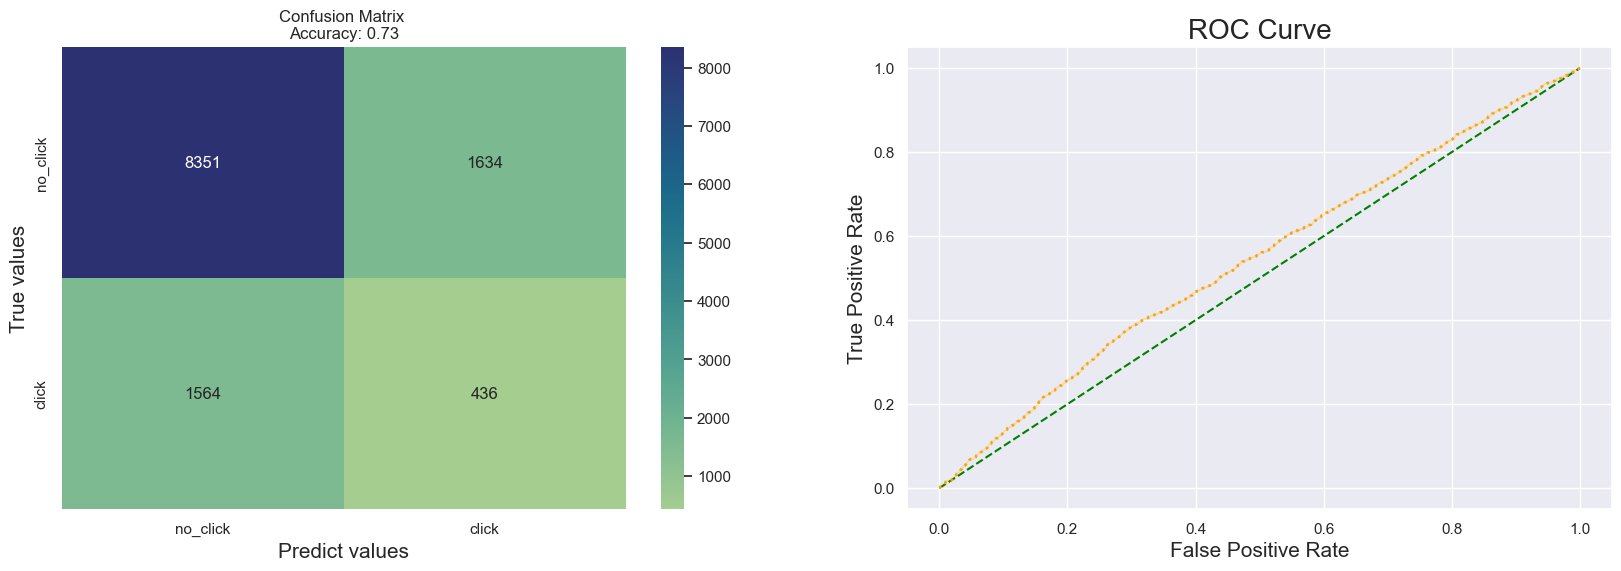

In [132]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

nbGauss_pipe = Pipeline([
    ("SMOTE_Oversample", SMOTE(random_state=1)),
    ("GaussianNB", GaussianNB())
])

nbGauss_pipe.fit(x_train, y_train)

y_test_pred = nbGauss_pipe.predict(x_test)
y_test_proba = nbGauss_pipe.predict_proba(x_test)

print(f'GaussianNB accuracy score on train set: {accuracy_score(y_train, nbGauss_pipe.predict(x_train))}')
print(f'GaussianNB accuracy score on test set: {accuracy_score(y_test, y_test_pred)}')
print()
labels = ['no_click', 'click']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap="crest", annot=True, fmt=".0f")
plt.xlabel('Predict values', size=15)
plt.ylabel('True values', size=15)
plt.title(f'Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_test_pred):.2f}')

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

plt.subplot(1,2,2)
sbn.lineplot(x=[0,1], y=[0,1], linestyle='--', color='green')
sbn.lineplot(x=fpr, y=tpr, linestyle='dotted', color='orange', linewidth=2)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC Curve', size=20)

plt.show()

### F1-score of "click" or 1 class is not high, the ROC Curve is bad
### <span style='color:yellow'>Let's try using RobustScaler

GaussianNB accuracy score on train set: 0.8243035439688159
GaussianNB accuracy score on test set: 0.8266166040884438


Confusion matrix:
           no_click  click
no_click      9822    163
click         1915     85


Classification report:
               precision    recall  f1-score   support

    no_click       0.84      0.98      0.90      9985
       click       0.34      0.04      0.08      2000

    accuracy                           0.83     11985
   macro avg       0.59      0.51      0.49     11985
weighted avg       0.75      0.83      0.77     11985



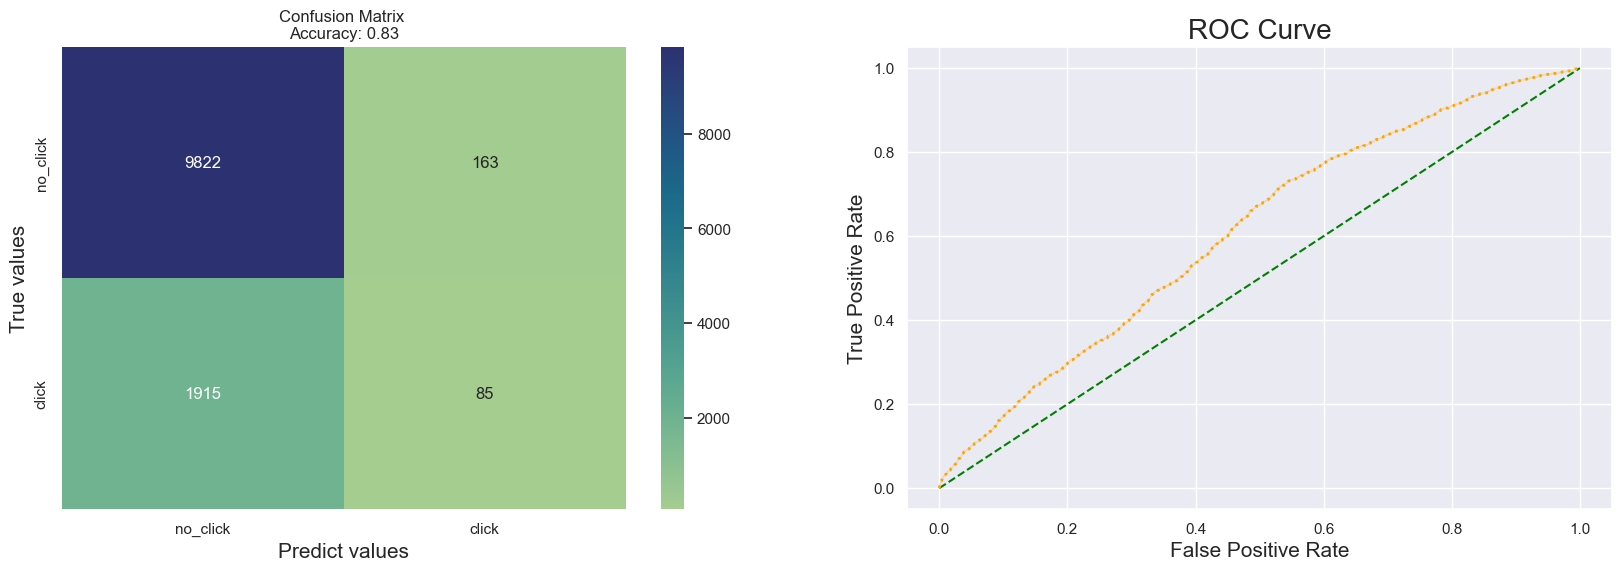

In [138]:
from sklearn.preprocessing import RobustScaler

nbGauss_pipe = Pipeline([
    ("SMOTE_Oversample", SMOTE(random_state=1)),
    ("Robust_Scaling", RobustScaler()),
    ("GaussianNB", GaussianNB())
])

nbGauss_pipe.fit(x_train, y_train)

y_test_pred = nbGauss_pipe.predict(x_test)
y_test_proba = nbGauss_pipe.predict_proba(x_test)

print(f'GaussianNB accuracy score on train set: {accuracy_score(y_train, nbGauss_pipe.predict(x_train))}')
print(f'GaussianNB accuracy score on test set: {accuracy_score(y_test, y_test_pred)}')
print()
labels = ['no_click', 'click']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap="crest", annot=True, fmt=".0f")
plt.xlabel('Predict values', size=15)
plt.ylabel('True values', size=15)
plt.title(f'Confusion Matrix \nAccuracy: {accuracy_score(y_test, y_test_pred):.2f}')

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

plt.subplot(1,2,2)
sbn.lineplot(x=[0,1], y=[0,1], linestyle='--', color='green')
sbn.lineplot(x=fpr, y=tpr, linestyle='dotted', color='orange', linewidth=2)
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC Curve', size=20)

plt.show()

### Nothing improved....